In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../data/regression.csv")

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_ssc = StandardScaler()
x_scaled = x_ssc.fit_transform(x)

x_scaled_tensor = torch.tensor(x_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

x_train, x_test, y_train, y_test = train_test_split(x_scaled_tensor, y_tensor, test_size=0.2, shuffle=True)

In [7]:
x_shape = x_train.shape[-1]

W = torch.zeros(x_shape, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)
_epochs = 2000

for epoch in range(_epochs + 1):
    
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(epoch, _epochs, cost.item()))

Epoch    0/2000 Cost: 29119.207031
Epoch  100/2000 Cost: 3204.607666
Epoch  200/2000 Cost: 2780.258057
Epoch  300/2000 Cost: 2770.976807
Epoch  400/2000 Cost: 2769.557617
Epoch  500/2000 Cost: 2768.428467
Epoch  600/2000 Cost: 2767.408691
Epoch  700/2000 Cost: 2766.472900
Epoch  800/2000 Cost: 2765.604492
Epoch  900/2000 Cost: 2764.791748
Epoch 1000/2000 Cost: 2764.025879
Epoch 1100/2000 Cost: 2763.300293
Epoch 1200/2000 Cost: 2762.610107
Epoch 1300/2000 Cost: 2761.950928
Epoch 1400/2000 Cost: 2761.320557
Epoch 1500/2000 Cost: 2760.716553
Epoch 1600/2000 Cost: 2760.136719
Epoch 1700/2000 Cost: 2759.579834
Epoch 1800/2000 Cost: 2759.043701
Epoch 1900/2000 Cost: 2758.528564
Epoch 2000/2000 Cost: 2758.032227


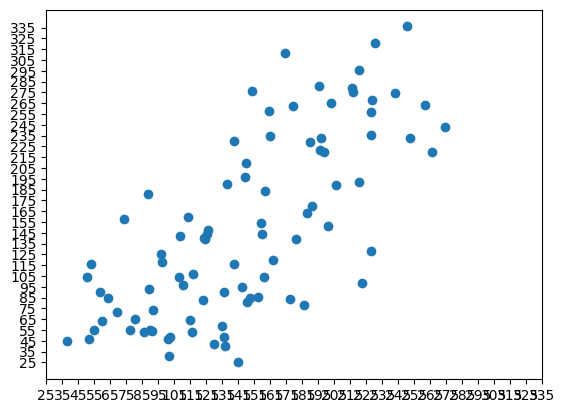

In [9]:
y_pred = x_test.matmul(W) + b
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

plt.scatter(y_pred, y_test)
plt.xticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.yticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.show()